In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import gzip


In [3]:
file_path = 'data/BeerAdvocate.tar'
with tarfile.open(file_path, 'r:') as tar:
    tar.extractall(path='../data')
    tar.list()

?rwxrwxrwx gayouf/gayouf   29617210 2017-10-27 18:01:43 beers.csv 
?rwxrwxrwx gayouf/gayouf  729167813 2017-08-03 14:28:54 reviews.txt.gz 
?rwxrwxrwx gayouf/gayouf    9751813 2017-08-07 13:23:35 users.csv 
?rwxrwxrwx gayouf/gayouf     808192 2017-08-04 18:22:30 breweries.csv 
?rwxrwxr-x gayouf/gayouf  926302646 2017-08-03 14:29:24 ratings.txt.gz 


Looking for the 10 most rated beers

                                      beer_name  nbr_ratings
226278                 Founders Breakfast Stout        16509
180458                            90 Minute IPA        15548
79091                           Pliny The Elder        14436
225955                          Two Hearted Ale        14305
95186                               Sculpin IPA        13835
197852                             Heady Topper        13426
225867                              Hopslam Ale        13026
226360  Founders KBS (Kentucky Breakfast Stout)        12599
77815       Old Rasputin Russian Imperial Stout        12194
251429               Bourbon County Brand Stout        12193


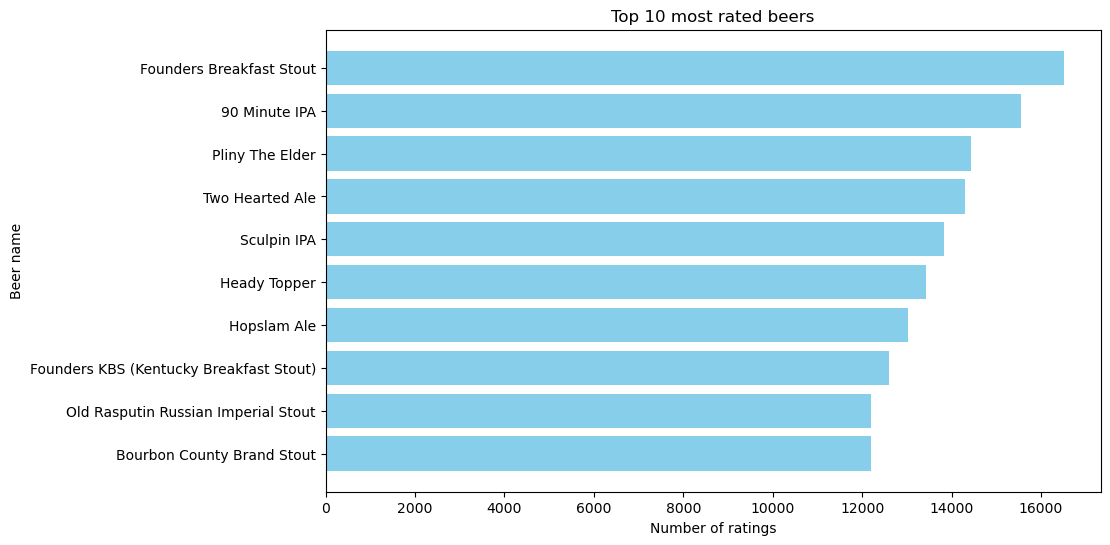

In [4]:
# Load the CSV file
df = pd.read_csv('../data/beers.csv')

# Sort by "number of ratings" in descending order and select the top 10
top_10_beers = df.sort_values(by="nbr_ratings", ascending=False).head(10)

# Display the top 10 most reviewed beers
print(top_10_beers[['beer_name', 'nbr_ratings']])

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_beers['beer_name'], top_10_beers['nbr_ratings'], color='skyblue')
plt.xlabel('Number of ratings')
plt.ylabel('Beer name')
plt.title('Top 10 most rated beers')
plt.gca().invert_yaxis()  
plt.show()

Looking for the 10 most reviewed beers

                                      beer_name  nbr_reviews
180458                            90 Minute IPA         3899
226278                 Founders Breakfast Stout         3811
77815       Old Rasputin Russian Imperial Stout         3722
79091                           Pliny The Elder         3690
225955                          Two Hearted Ale         3561
225867                              Hopslam Ale         3527
82585             Sierra Nevada Celebration Ale         3466
226360  Founders KBS (Kentucky Breakfast Stout)         3221
97619                       Stone Ruination IPA         3075
76313                      Arrogant Bastard Ale         3066


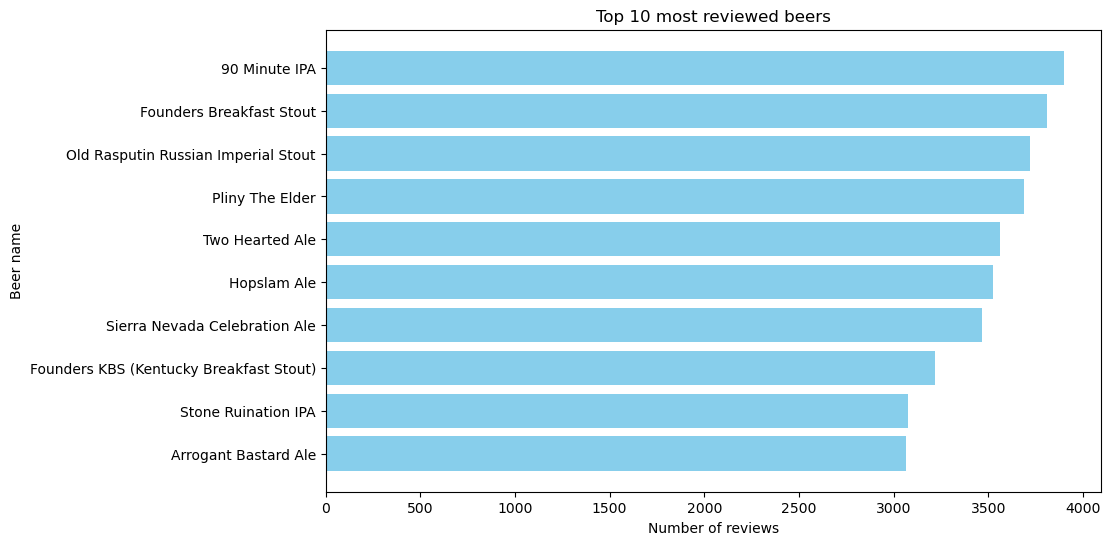

In [5]:
# Sort by "number of reviews" in descending order and select the top 10
top_10_beers = df.sort_values(by="nbr_reviews", ascending=False).head(10)

# Display the top 10 most reviewed beers
print(top_10_beers[['beer_name', 'nbr_reviews']])

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_beers['beer_name'], top_10_beers['nbr_reviews'], color='skyblue')
plt.xlabel('Number of reviews')
plt.ylabel('Beer name')
plt.title('Top 10 most reviewed beers')
plt.gca().invert_yaxis()  
plt.show()

Performing a statistical analysis to compar the number of ratings and reviews for each of the top 10 beers

                                      beer_name  nbr_ratings  nbr_reviews  \
180458                            90 Minute IPA        15548         3899   
226278                 Founders Breakfast Stout        16509         3811   
77815       Old Rasputin Russian Imperial Stout        12194         3722   
79091                           Pliny The Elder        14436         3690   
225955                          Two Hearted Ale        14305         3561   
225867                              Hopslam Ale        13026         3527   
82585             Sierra Nevada Celebration Ale        10221         3466   
226360  Founders KBS (Kentucky Breakfast Stout)        12599         3221   
97619                       Stone Ruination IPA        10821         3075   
76313                      Arrogant Bastard Ale        10597         3066   

        rating_review_diff  
180458               11649  
226278               12698  
77815                 8472  
79091                10746  
225955 

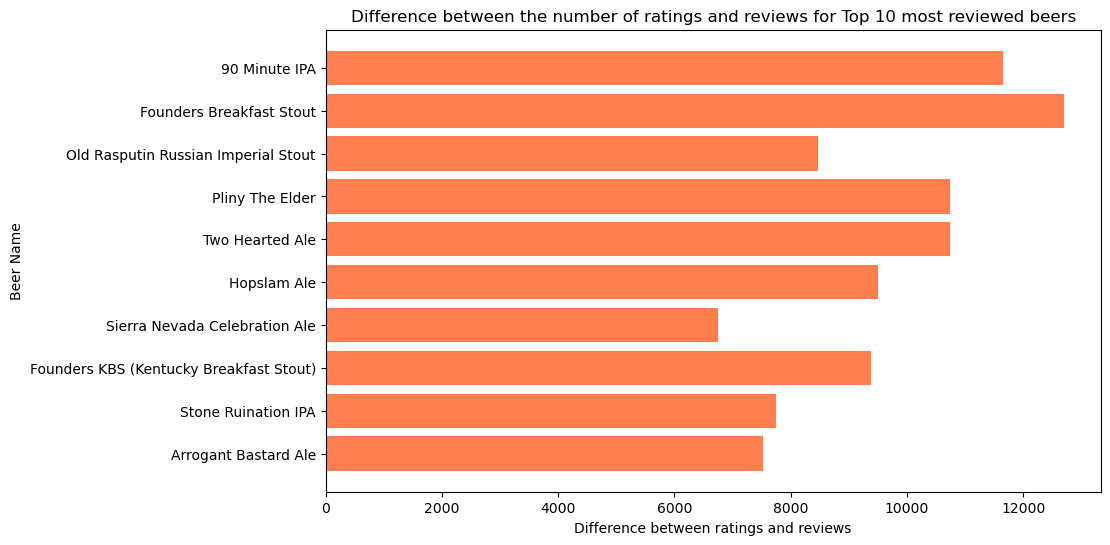

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


top_10_beers = df.sort_values(by="nbr_reviews", ascending=False).head(10)

# Calculate the difference between ratings and reviews
top_10_beers['rating_review_diff'] = top_10_beers['nbr_ratings'] - top_10_beers['nbr_reviews']

# Display the results
print(top_10_beers[['beer_name', 'nbr_ratings', 'nbr_reviews', 'rating_review_diff']])

# Summary statistics for the difference
diff_summary = top_10_beers['rating_review_diff'].describe()
print("\nSummary Statistics for Rating-Review Difference:")
print(diff_summary)

# Plot the difference
plt.figure(figsize=(10, 6))
plt.barh(top_10_beers['beer_name'], top_10_beers['rating_review_diff'], color='coral')
plt.xlabel('Difference between ratings and reviews')
plt.ylabel('Beer Name')
plt.title('Difference between the number of ratings and reviews for Top 10 most reviewed beers')
plt.gca().invert_yaxis()  # Show most reviewed beer at the top
plt.show()


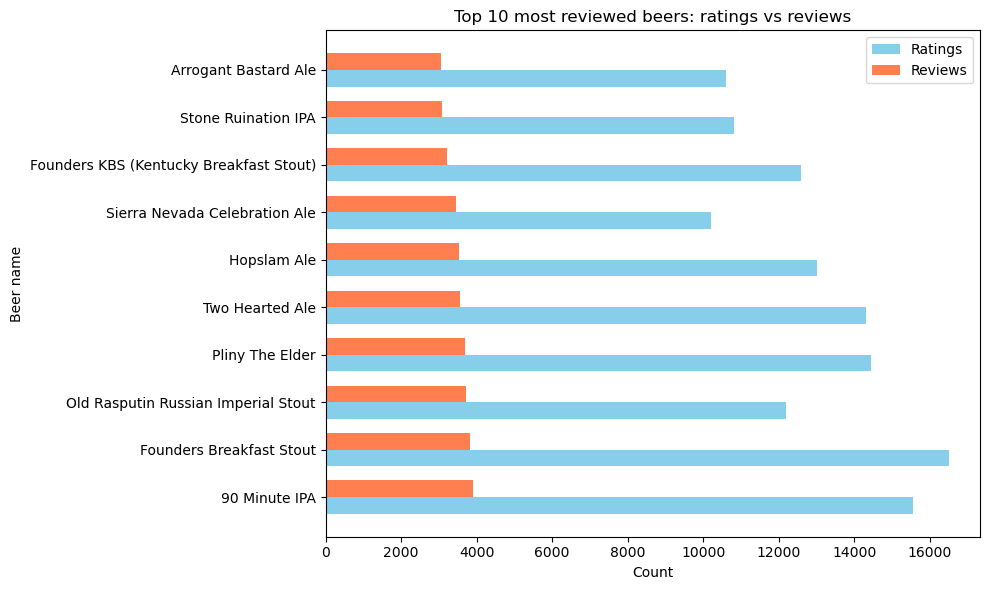

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


top_10_beers = df.sort_values(by="nbr_reviews", ascending=False).head(10)

# Plot: Side-by-Side bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Bar width for side-by-side bars
index = range(len(top_10_beers))

# Create bars for number of ratings and reviews
ax.barh(index, top_10_beers['nbr_ratings'], bar_width, label='Ratings', color='skyblue')
ax.barh([i + bar_width for i in index], top_10_beers['nbr_reviews'], bar_width, label='Reviews', color='coral')

ax.set_xlabel('Count')
ax.set_ylabel('Beer name')
ax.set_title('Top 10 most reviewed beers: ratings vs reviews')
ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(top_10_beers['beer_name'])
ax.legend()

plt.tight_layout()
plt.show()


Associating a taste to each of the 10 most rated beers

In [4]:
# Load the data directly from the gzip file
ratings_df = pd.read_csv(
    "/Users/clemencekiehl/Documents/GitHub/data/ratings.txt.gz",
    sep=":", 
    compression="gzip", 
    header=None, 
    on_bad_lines="skip"
)
# Give columns appropriate names based on your file structure (assume this layout as an example)
ratings_df.columns = ["beer_name", "beer_id", "brewery_name", "brewery_id", "style", "abv", "date", 
                      "user_name", "user_id", "appearance", "aroma", "palate", "taste", "overall", "rating", "text", "review"]

# If your columns don’t match exactly, update `columns` list above based on actual data
ratings_df['taste'] = pd.to_numeric(ratings_df['taste'], errors='coerce')

# Filter for top 10 most rated beers
top_beer_names = top_most_rated_beers['beer name'].tolist()
top_beer_ratings = ratings_df[ratings_df['beer_name'].isin(top_beer_names)]

# Calculate the average taste score for each beer
avg_taste_scores = top_beer_ratings.groupby('beer_name')['taste'].mean().reset_index()

# Merge with the top 10 DataFrame
top_10_with_taste = pd.merge(top_most_rated_beers, avg_taste_scores, left_on='beer name', right_on='beer_name')

# Display the results
print(top_10_with_taste[['beer name', 'number of ratings', 'taste']])

ValueError: Length mismatch: Expected axis has 2 elements, new values have 17 elements

In [4]:
# Read the first lines to oberse the structure of the file
ratings_df = pd.read_csv(
    "/Users/clemencekiehl/Documents/GitHub/data/ratings.txt.gz",
    sep=":", 
    compression="gzip", 
    header=None, 
    on_bad_lines="skip"
)

# display the first lines
print(ratings_df.head())

              0                                           1
0     beer_name                                       Régab
1       beer_id                                      142544
2  brewery_name   Societe des Brasseries du Gabon (SOBRAGA)
3    brewery_id                                       37262
4         style                             Euro Pale Lager


One can see that the file is structured with key-value pairs where each line contains a single attribute of the beer, followed by its corresponding value. Each attribute is on its line, followed by its value. This requires processing line by line to accumulate values for each beer.

In [5]:
# Define the file path
file_path = "/Users/clemencekiehl/Documents/GitHub/data/ratings.txt.gz"

# Initialize an empty list to store processed data
ratings_data = []

# Read the file in chunks
chunk_size = 100000  
with gzip.open(file_path, "rt", encoding="utf-8") as file:
    chunk = []
    
    for line in file:
        if line.strip():
            key, value = line.split(":", 1)
            chunk.append({key.strip(): value.strip()})
        
        # When a chunk is full (or end of the data is reached), process it
        if len(chunk) >= chunk_size:
            ratings_data.extend(chunk)
            chunk = []  # Reset chunk
    
    # Process the last remaining chunk
    if chunk:
        ratings_data.extend(chunk)

# Convert the list of dictionaries to a pandas DataFrame
ratings_df = pd.DataFrame(ratings_data)

# Print first few rows to confirm
print(ratings_df.head())

# Optionally, convert the 'taste' column to numeric if needed
ratings_df['taste'] = pd.to_numeric(ratings_df['taste'], errors='coerce')
print(ratings_df.head())

In [5]:
import gzip
import pandas as pd

# List of the 10 most-rated beers
most_rated_beers = [
    'Founders Breakfast Stout', '90 Minute IPA', 'Pliny The Elder', 'Two Hearted Ale',
    'Sculpin IPA', 'Heady Topper', 'Hopslam Ale', 'Founders KBS (Kentucky Breakfast Stout)',
    'Old Rasputin Russian Imperial Stout', 'Bourbon County Brand Stout'
]

# Initialize a dictionary to store cumulative scores and counts for each beer
beer_data = {beer: {'aroma': [], 'palate': [], 'taste': [], 'abv': None} for beer in most_rated_beers}

# Read the gzip-compressed file
with gzip.open('/Users/clemencekiehl/Documents/GitHub/data/ratings.txt.gz', 'rt', encoding='utf-8') as file:
    beer_info = {}

    for line in file:
        line = line.strip()
        if line:
            # Split line into key-value pair
            if ':' in line:
                key, value = line.split(":", 1)
                beer_info[key.strip()] = value.strip()
        
        # When we encounter an empty line, process the current beer info
        if line == '':
            beer_name = beer_info.get('beer_name', 'N/A')
            if beer_name in most_rated_beers:
                try:
                    # Convert to float and append
                    beer_data[beer_name]['aroma'].append(float(beer_info.get('aroma', 0)))
                    beer_data[beer_name]['palate'].append(float(beer_info.get('palate', 0)))
                    beer_data[beer_name]['taste'].append(float(beer_info.get('taste', 0)))
                    # Set abv if it hasn't been set yet and is valid
                    if beer_data[beer_name]['abv'] is None:
                        beer_data[beer_name]['abv'] = float(beer_info.get('abv', 0))
                except ValueError as e:
                    print(f"ValueError for {beer_name}: {e}")  # Debugging: Print error if conversion fails

                # Debugging: Print the collected data for each beer
                print(f"Processed {beer_name}:")
                print(f"Aroma: {beer_data[beer_name]['aroma']}")
                print(f"Palate: {beer_data[beer_name]['palate']}")
                print(f"Taste: {beer_data[beer_name]['taste']}")
                print(f"ABV: {beer_data[beer_name]['abv']}")
                
            # Reset for the next beer
            beer_info = {}

# Calculate averages and create DataFrame
data = []
for beer_name, attributes in beer_data.items():
    data.append({
        'beer_name': beer_name,
        'aroma': sum(attributes['aroma']) / len(attributes['aroma']) if attributes['aroma'] else None,
        'palate': sum(attributes['palate']) / len(attributes['palate']) if attributes['palate'] else None,
        'taste': sum(attributes['taste']) / len(attributes['taste']) if attributes['taste'] else None,
        'abv': attributes['abv']
    })

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('most_rated_beers_avg_tasting_data.csv', index=False)
print(df)


In [37]:
#FICHIER SCRIPT

import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def format_data(data, id_type="review_id", chunk_size=1600):
    """
    Processes the given data to convert it to a more readable format

    Parameters:
    - data (pandas.DataFrame): input dataframe that contains the 'info' column with key-value pairs
    - id_type (str):  column name to be used for the unique identifier
    - chunk_size (int): size of each chunk to process at a time to optimize memory usage

    Returns:
    - processed_data (pandas.DataFrame): dataframe where each row corresponds to a unique ID
    """
    processed_data = []  # Temporary list to hold processed data

    for start in range(0, len(data), chunk_size):
        # Extract a chunk of data
        chunk = data.iloc[start:start + chunk_size].copy()

        # Add id_type based on the 16-row structure
        chunk[id_type] = chunk.index // 16

        # Split key-value pairs
        split_data = chunk['info'].str.split(': ', n=1, expand=True)
        chunk = chunk[split_data[1].notna()]  # Keep rows with valid key-value pairs

        # Assign key and value columns
        chunk[['key', 'value']] = split_data

        # Pivot the chunk to convert key to columns
        chunk_pivoted = chunk.pivot(index=id_type, columns='key', values='value').reset_index(drop=True)
        processed_data.append(chunk_pivoted)

    processed_data = pd.concat(processed_data, ignore_index=True)

    return processed_data



def seasonal_region_abv_test(reviews, abv_category, rating_column):
    """
    Perform ANOVA to assess if there are significant differences in ratings between regions (South, Midwest, Northeast, and West)
    across seasons for a specified ABV category (either 'low', 'medium', or 'high')and rating column (either aroma, palate, taste, appearance, overall, or rating). If the ANOVA test is significant, it runs Tukey's HSD test.

    Parameters:
    - reviews (pd.DataFrame): dataset containing reviews
    - abv_category (str): ABV category to filter by
    - rating_column (str): rating column to analyze

    Returns:
    - dict: Dictionary with seasons as keys and p-values/Tukey's HSD results as values
    """

    filtered_reviews = reviews[reviews['abv_category'] == abv_category]

    results = {}
    for season in reviews['season'].unique() \
            :

        season_data = filtered_reviews[filtered_reviews['season'] == season]

        ratings_by_region = [season_data[season_data['region'] == region][rating_column]
                             for region in season_data['region'].unique()]

        f_stat, p_value = stats.f_oneway(*ratings_by_region)
        results[season] = {'ANOVA_p_value': p_value}

        # If ANOVA is significant: perform Tukey's HSD
        if p_value < 0.05:
            tukey = pairwise_tukeyhsd(endog=season_data[rating_column], groups=season_data['region'], alpha=0.05)
            results[season]['Tukey_HSD'] = tukey.summary()
            print(f"season: {season}, ABV category: {abv_category}, rating column: {rating_column}")
            print(f"ANOVA p-value: {p_value:.4f} - Significant difference between regions")
            print(tukey.summary())
        else:
            print(f"season: {season}, ABV category: {abv_category}, rating column: {rating_column}")
            print(f"ANOVA p-value: {p_value:.4f} - No significant difference between regions")

        print("-" * 50)

    return results



def seasonal_region_test(reviews, rating_column):
    """
    Perform ANOVA to assess if there are significant differences in ratings between regions (South, Midwest, Northeast, and West)
    across seasons for a specified rating column (either aroma, palate, taste, appearance, overall, or rating).
    If the ANOVA test is significant, it runs Tukey's HSD test.

    Parameters:
    - reviews (pd.DataFrame): dataset containing reviews
    - rating_column (str): rating column to analyze

    Returns:
    - dict: Dictionary with seasons as keys and p-values/Tukey's HSD results as values
    """

    results = {}
    for season in reviews['season'].unique():

        season_data = reviews[reviews['season'] == season]

        # Group ratings by region
        ratings_by_region = [season_data[season_data['region'] == region][rating_column]
                             for region in season_data['region'].unique()]

        # Perform ANOVA
        f_stat, p_value = stats.f_oneway(*ratings_by_region)
        results[season] = {'ANOVA_p_value': p_value}

        # If ANOVA is significant: perform Tukey's HSD
        if p_value < 0.05:
            tukey = pairwise_tukeyhsd(endog=season_data[rating_column], groups=season_data['region'], alpha=0.05)
            results[season]['Tukey_HSD'] = tukey.summary()
            print(f"Season: {season}, Rating Column: {rating_column}")
            print(f"ANOVA p-value: {p_value:.4f} - Significant difference between regions")
            print(tukey.summary())
        else:
            print(f"Season: {season}, Rating Column: {rating_column}")
            print(f"ANOVA p-value: {p_value:.4f} - No significant difference between regions")

        print("-" * 50)

    return results

**SENTIMENT ANALYSIS**

We will only perform the sentiment analysis on the reviews written by american users

In [49]:
# Keep only users from the US
# Load the CSV file


# Read the users data
users_ba = pd.read_csv('../data/users.csv')
reviews_ba = pd.read_csv('../data/reviews.txt.gz', names=["info"], header=None, delimiter='\t', on_bad_lines='skip')


import sys
sys.path.append('src')


reviews_ba = format_data(reviews_ba, "review_id")


# Separate the country and the states from the 'location' column
users_ba['country'] = users_ba['location'].str.split(',').str[0]
users_ba['states'] = users_ba['location'].str.split(',').str[1]

# Handle missing country values
missing_countries = users_ba['country'].isna().sum()

# Replace missing 'country' values with a label "Unknown"
users_ba['country'] = users_ba['country'].fillna('Unknown')

# Filter users from the United States
users_us = users_ba[users_ba['country'] == 'United States']

# Print the number of missing countries and the first few rows of the filtered users
print(f"Missing countries: {missing_countries}")
print(users_us.head())


# Merge the reviews with user information on location
reviews_ba = reviews_ba.merge(users_ba[['user_id', 'location']], on='user_id', how='left')
# Remove the states to only have the countries
reviews_ba['country'] = reviews_ba['location'].str.split(',').str[0]

# Remove the countries to only have the states
reviews_ba['states'] = reviews_ba['location'].str.split(',').str[1]

# We only keep users from the US
reviews_ba = reviews_ba[reviews_ba['country'] == 'United States']
print(reviews_ba.columns)



Missing countries: 31279
   nbr_ratings  nbr_reviews                user_id       user_name  \
0         7820          465         nmann08.184925         nmann08   
1         2521         2504     stjamesgate.163714     StJamesGate   
5         2326            0        hellpop65.48993       Hellpop65   
6         3098            0         latarnik.52897        Latarnik   
7         1866           23  rochefortchris.697017  RochefortChris   

         joined                       location        country           states  
0  1.199704e+09      United States, Washington  United States       Washington  
1  1.191838e+09        United States, New York  United States         New York  
5  1.131966e+09          United States, Kansas  United States           Kansas  
6  1.133521e+09      United States, New Jersey  United States       New Jersey  
7  1.349172e+09  United States, North Carolina  United States   North Carolina  
   abv appearance aroma beer_id      beer_name brewery_id  \
0  4.5 

In [59]:
print(reviews_ba.head(20))


                                                 info
0                                    beer_name: Régab
1                                     beer_id: 142544
2   brewery_name: Societe des Brasseries du Gabon ...
3                                   brewery_id: 37262
4                              style: Euro Pale Lager
5                                            abv: 4.5
6                                    date: 1440064800
7                                  user_name: nmann08
8                             user_id: nmann08.184925
9                                    appearance: 3.25
10                                        aroma: 2.75
11                                       palate: 3.25
12                                        taste: 2.75
13                                       overall: 3.0
14                                       rating: 2.88
15  text: From a bottle, pours a piss yellow color...
16                           beer_name: Barelegs Brew
17                          

In [52]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Ensure you have these NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()


# Step 2: Define preprocessing function for reviews
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    return words

# Step 3: Analyze sentiment and extract words
all_words = []
sentiments = []

for review in reviews_ba['info']:
    words = preprocess_text(review)
    all_words.extend(words)  # Collect words for frequency analysis
    # Calculate sentiment score
    sentiment = sia.polarity_scores(review)['compound']
    sentiments.append(sentiment)

# Step 4: Find the 10 most frequent words
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(10)

# Step 5: Create a DataFrame to store sentiment scores and display results
reviews_ba['sentiment'] = sentiments
print("Most frequent words:", most_common_words)
print("Sample of Reviews with Sentiment Scores:\n", reviews_ba[['info', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/clemencekiehl/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/clemencekiehl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/clemencekiehl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyError: 'info'

In [53]:
print(reviews_ba.columns)


Index(['abv', 'appearance', 'aroma', 'beer_id', 'beer_name', 'brewery_id',
       'brewery_name', 'date', 'overall', 'palate', 'rating', 'style', 'taste',
       'text', 'user_id', 'user_name', 'location', 'country', 'states'],
      dtype='object')


In [20]:
file_path = './data/BeerAdvocate/reviews.txt.gz'

with gzip.open(file_path, 'rt') as f:
    file_content = f.read()

In [21]:
import re
import wordcloud
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [51]:
# Create a pandas DataFrame from parsing the reviews from the file

reviewsL = []
current_review = {}
current_key = None

# Open and read the .gz file
with gzip.open(file_path, 'rt') as f:
    for line in f:
        line = line.strip()
        if line == "":
            if current_review:
                reviewsL.append(current_review)
                current_review = {}
                current_key = None

        else:
            if ":" in line:
                key, value = line.split(":", 1)
                current_review[key] = value
                current_key = key
            else:
                if current_key:
                    current_review[current_key] += " " + line
                else:
                    print(f"Skipping line without key : {line}")

    if current_review:
        reviews.append(current_review)

data = pd.DataFrame(reviews)
print(data.head())


        beer_name  beer_id                                brewery_name  \
0           Régab   142544   Societe des Brasseries du Gabon (SOBRAGA)   
1   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
2   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
3   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   
4   Barelegs Brew    19590        Strangford Lough Brewing Company Ltd   

  brewery_id              style   abv         date         user_name  \
0      37262    Euro Pale Lager   4.5   1440064800           nmann08   
1      10093   English Pale Ale   4.5   1235127600       StJamesGate   
2      10093   English Pale Ale   4.5   1142247600           mdagnew   
3      10093   English Pale Ale   4.5   1101898800   helloloser12345   
4      10093   English Pale Ale   4.5   1093860000        cypressbob   

                  user_id appearance  aroma palate  taste overall rating  \
0          nmann08.184925       3.25   2.75   

In [ ]:
#Flatten the list of words from all reviews
all_words = [word from review in data['cleaned_tokens'] for word in review]

#Count word frequencies
word_freq = Counter(all_words)

#Print top 10 most common words
print(word_freq.most_common(10))

#Generate the word cloud
wordcloud = Wordcloud(width=800, height=400, background_color= 'white').generate_from_frequencies(word_freq)

#Plot the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Plot the top 10 most frequent words as a bar plot
top_words = word_freq.most_common(10)
words, counts

In [56]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
import re

# Preprocess reviews to keep only those from US users
users_ba = pd.read_csv('../data/users.csv')
reviews_ba = pd.read_csv('./data/BeerAdvocate/reviews.txt.gz', names=["info"], header=None, delimiter='\t', on_bad_lines='skip')

# Split location column
users_ba['country'] = users_ba['location'].str.split(',').str[0]
us_users = users_ba[users_ba['country'] == 'United States']

# Merge reviews with US-only users
us_reviews = reviews_ba.merge(us_users[['user_id']], on='user_id', how='inner')

# Sentiment analysis and most frequent words extraction
analyzer = SentimentIntensityAnalyzer()
all_words = []
sentiments = []

# Text preprocessing
def preprocess_text(text):
    words = re.findall(r'\b\w+\b', text.lower())  # Find words, ignoring punctuation and case
    return words

# Perform sentiment analysis and word counting
for review in us_reviews['info']:
    words = preprocess_text(review)
    all_words.extend(words)
    
    sentiment_score = analyzer.polarity_scores(review)
    sentiments.append(sentiment_score['compound'])

# Calculate frequency of the 10 most common words
word_freq = Counter(all_words).most_common(10)
print("Most Frequent Words:", word_freq)

# Display sentiment distribution
print("Average Sentiment Score:", sum(sentiments) / len(sentiments))


KeyError: 'user_id'

In [60]:
def fromLineToDataFrame(df):

    df['info'] = df['info'].astype(str)
    print("converted to string")
    df[['key', 'value']] = df['info'].str.extract(r'([^:]+):\s*(.*)')
    print("extracted key and value")
# Fill any missing values in the 'value' column with an empty string
    df['value'] = df['value'].fillna('')
    # Identify the start of each new beer entry by finding 'beer_name' rows
    df['entry_id'] = (df['key'] == 'beer_name').cumsum()
    display(df.head())
    print("identified start of each new beer entry")
    # Remove duplicates within each entry (entry_id) by keeping only the first occurrence of each key
    df = df.drop_duplicates(subset=['entry_id', 'key'])
    print("removed duplicates")
    # Reshape the DataFrame using pivot
    df_wide = df.pivot(index='entry_id', columns='key', values='value')
    print("reshaped the DataFrame")
    # Optional: Reset index to remove multi-index structure
    df_wide.reset_index(drop=True, inplace=True)
    return df_wide
# Convert the reviews to a DataFrame with columns other than 'info'
reviews = fromLineToDataFrame(reviews_ba)

converted to string
extracted key and value


,info,key,value,entry_id
0,beer_name: Régab,beer_name,Régab,1
1,beer_id: 142544,beer_id,142544,1
2,brewery_name: Societe des Brasseries du Gabon ...,brewery_name,Societe des Brasseries du Gabon (SOBRAGA),1
3,brewery_id: 37262,brewery_id,37262,1
4,style: Euro Pale Lager,style,Euro Pale Lager,1


identified start of each new beer entry
removed duplicates
reshaped the DataFrame


In [61]:
display(reviews.head())

key,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,style,taste,text,user_id,user_name
0,4.5,3.25,2.75,142544,Régab,37262,Societe des Brasseries du Gabon (SOBRAGA),1440064800,3.0,3.25,2.88,Euro Pale Lager,2.75,"From a bottle, pours a piss yellow color with ...",nmann08.184925,nmann08
1,4.5,3.0,3.5,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,1235127600,3.5,3.5,3.67,English Pale Ale,4.0,Pours pale copper with a thin head that quickl...,stjamesgate.163714,StJamesGate
2,4.5,4.0,3.5,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,1142247600,3.5,3.5,3.73,English Pale Ale,4.0,"500ml Bottle bought from The Vintage, Antrim.....",mdagnew.19527,mdagnew
3,4.5,4.0,3.5,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,1101898800,4.5,4.0,3.98,English Pale Ale,4.0,Serving: 500ml brown bottlePour: Good head wit...,helloloser12345.10867,helloloser12345
4,4.5,4.0,4.0,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,1093860000,4.0,4.0,4.00,English Pale Ale,4.0,"500ml bottlePours with a light, slightly hazy ...",cypressbob.3708,cypressbob


In [62]:
# we merge the reviews with the users to filter only the US users
reviews = reviews.merge(users_ba[['user_id', 'location']], on='user_id', how='left')
reviews['country'] = reviews['location'].str.split(',').str[0]
reviews = reviews[reviews['country'] == 'United States']



In [67]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
import re
from tqdm import tqdm
def preprocess_text(text):
    words = re.findall(r'\b\w+\b', text.lower())  # Find words, ignoring punctuation and case
    return words
reviews['cleaned_tokens'] = reviews['text'].progress_apply(preprocess_text)

In [81]:
#Flatten the list of words from all reviews
from tqdm import tqdm
all_words = [word for review in tqdm(reviews['cleaned_tokens'],desc="Processing") for word in review]
stop_words = set(stopwords.words('english'))
words = [word for word in tqdm(all_words,desc="Processing") if word.isalpha() and word not in stop_words]


#Count word frequencies
word_freq = Counter(words)

#Print top 10 most common words
print(word_freq.most_common(10))



Processing: 100%|██████████| 276192374/276192374 [00:58<00:00, 4730682.84it/s]


[('beer', 2580504), ('head', 2013966), ('taste', 1469998), ('light', 1409812), ('nice', 1402506), ('good', 1306917), ('like', 1301014), ('malt', 1252980), ('sweet', 1167667), ('hops', 1146945)]


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color= 'white').generate_from_frequencies(word_freq)
print("Word cloud generated")

#Plot the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Plot the top 10 most frequent words as a bar plot
top_words = word_freq.most_common(10)
words, counts